# Mínimos cuadrados
## Prueba 02
Interpole los siguientes conjuntos de datos con la función correspondiente. 

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al realizar el proceso de mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$

In [1]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

# Conjunto de datos de ejemplo

In [2]:
xs = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys = [
    -12.7292,
    -7.5775,
    -7.7390,
    -4.1646,
    -4.5382,
    2.2048,
    4.3369,
    2.2227,
    9.0625,
    7.1860,
]

In [3]:
from src import ajustar_min_cuadrados  # no modificar esta función

pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

[01-12 11:18:22][INFO] 2026-01-12 11:18:22.340739
[01-12 11:18:24][INFO] 2026-01-12 11:18:24.066199
[01-12 11:18:24][INFO] Se ajustarán 2 parámetros.
[01-12 11:18:24][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


[01-12 11:18:28][INFO] Se ajustarán 2 parámetros.
[01-12 11:18:28][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


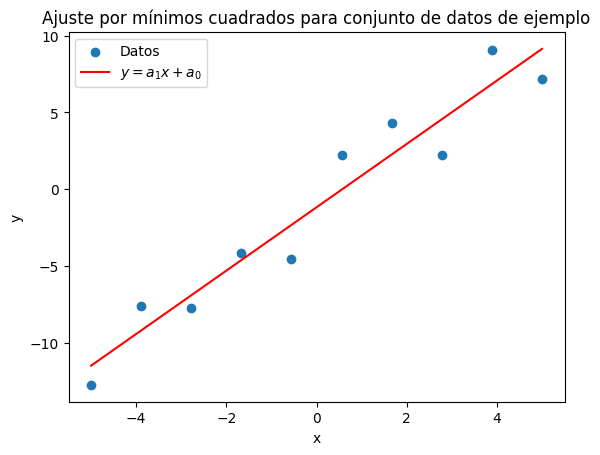

In [4]:
import numpy as np
import matplotlib.pyplot as plt

m, b = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

x = np.linspace(-5, 5, 100)

y = [m * xi + b for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados para conjunto de datos de ejemplo")
plt.legend()
plt.show()

## Conjunto de datos 1

In [30]:
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

In [31]:
import numpy as np
def der_parcial_0(xs1: list, ys1: list) -> tuple[float, float, float]:
    xs_np = np.array(xs1)
    ys_np = np.array(ys1)

    c_ind = np.sum(ys_np)
    c_2 = np.sum(xs_np**2)
    c_1 = np.sum(xs_np)
    c_0 = len(xs_np)
    return (c_2, c_1, c_0, c_ind)

def der_parcial_1(xs1: list, ys1: list) -> tuple[float, float, float]:
    xs_np = np.array(xs1)
    ys_np = np.array(ys1)

    c_ind = np.sum(xs_np * ys_np)
    c_2 = np.sum(xs_np**3)
    c_1 = np.sum(xs_np**2)
    c_0 = np.sum(xs_np)
    return (c_2, c_1, c_0, c_ind)

def der_parcial_2(xs1: list, ys1: list) -> tuple[float, float, float]:
    xs_np = np.array(xs1)
    ys_np = np.array(ys1)

    c_ind = np.sum(xs_np**2 * ys_np)
    c_2 = np.sum(xs_np**4)
    c_1 = np.sum(xs_np**3)
    c_0 = np.sum(xs_np**2)
    return (c_2, c_1, c_0, c_ind)

In [32]:
from src import ajustar_min_cuadrados  # no modificar esta función

ajustar_min_cuadrados(xs1, ys1, gradiente=[der_parcial_0, der_parcial_1, der_parcial_2])

[01-12 11:33:32][INFO] Se ajustarán 3 parámetros.
[01-12 11:33:32][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
[01-12 11:33:32][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]


[np.float64(2.024410482925083),
 np.float64(-1.1233251295755433),
 np.float64(-0.6382556172537739)]

In [41]:
# y(2.25)
y =(2.024410482925083*2.25**2)-(1.1233251295755433*2.25)-0.6382556172537739
print(y)
#y(-2.25)
y1 = (2.024410482925083*-2.25**2)-(1.1233251295755433*-2.25)-0.6382556172537739 
print(y1)

7.082840911009486
-8.359352145517034


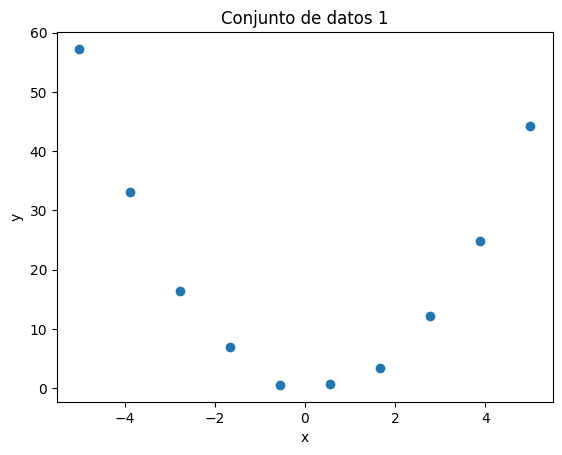

In [ ]:
plt.scatter(xs1, ys1)
plt.xlabel("x")
plt.ylabel("y")-8.359352145517034
plt.title("Conjunto de datos 1")
plt.show()

[01-12 11:35:52][INFO] Se ajustarán 3 parámetros.
[01-12 11:35:52][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
[01-12 11:35:52][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]


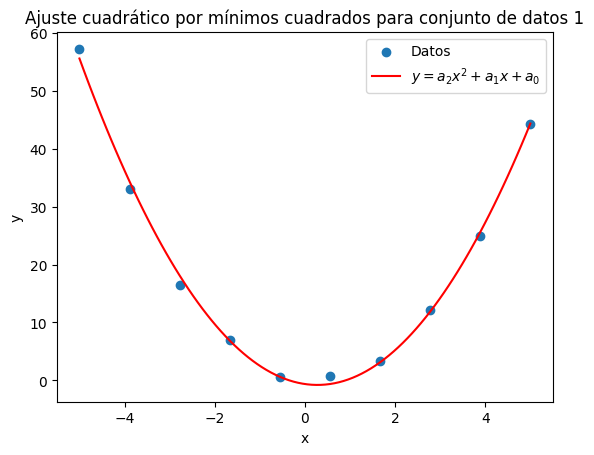

In [35]:
#Graficar resultados del ajuste cuadrático
m2, m1, b = ajustar_min_cuadrados(xs1, ys1, gradiente=[der_parcial_0, der_parcial_1, der_parcial_2])    
x = np.linspace(-5, 5, 100)
y = [m2 * xi**2 + m1 * xi + b for xi in x]
plt.scatter(xs1, ys1, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_2 x^2 + a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste cuadrático por mínimos cuadrados para conjunto de datos 1")
plt.legend()
plt.show()

Interpole el conjunto de datos 1 usando la función cuadrática. 

## Conjunto de datos 2

In [42]:
xs2 = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys2 = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]

In [43]:
def der_parcial_0(xs2: list, ys2: list) -> tuple[float, float, float]:
    xs_np = np.array(xs2)
    ys_np = np.log(np.array(ys2))

    c_ind = np.sum(ys_np)
    c_1 = len(xs_np)
    c_0 = np.sum(xs_np)
    return (c_1, c_0, c_ind)

def der_parcial_1(xs2: list, ys2: list) -> tuple[float, float, float]:
    xs_np = np.array(xs2)
    ys_np = np.log(np.array(ys2))

    c_ind = np.sum(xs_np * ys_np)
    c_1 = np.sum(xs_np)
    c_0 = np.sum(xs_np**2)
    return (c_1, c_0, c_ind)

In [44]:
from src import ajustar_min_cuadrados  # no modificar esta función

ajustar_min_cuadrados(xs1, ys1, gradiente=[der_parcial_0, der_parcial_1])

[01-12 11:47:53][INFO] Se ajustarán 2 parámetros.
[01-12 11:47:53][INFO] 
[[ 10.           0.          22.09298203]
 [  0.         101.8525926   -4.28278681]]


[np.float64(2.2092982031244675), np.float64(-0.04204887373505659)]

In [47]:
coef = ajustar_min_cuadrados(xs2, ys2, gradiente=[der_parcial_0, der_parcial_1])

In_a = coef[0]
b = coef[1]

a_real = np.exp(In_a)

print(f"La ecuación real es: y = {a_real} * e^({b} * x)")

[01-12 11:49:59][INFO] Se ajustarán 2 parámetros.
[01-12 11:49:59][INFO] 
[[20.         22.0372     19.05727035]
 [ 0.         10.54683259 14.94655314]]
La ecuación real es: y = 0.5440855388147074 * e^(1.4171603667055426 * x)


In [50]:
# y(5)
y = 0.5440855388147074 * np.exp(1.4171603667055426  * 5)
print(y)
# y(1)
y2 = 0.5440855388147074 * np.exp(1.4171603667055426  * 1)
print(y2)

650.1174439111674
2.2445646053759503


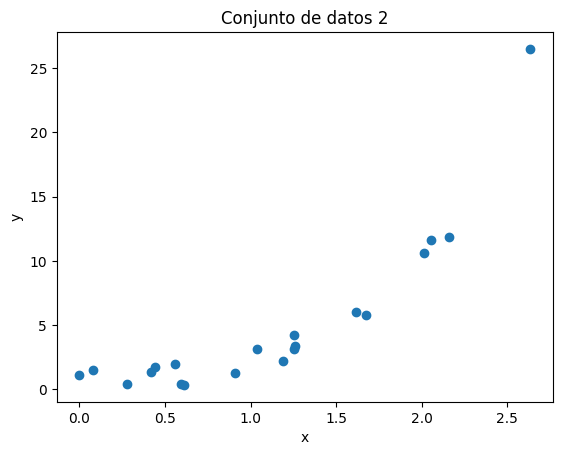

In [48]:
plt.scatter(xs2, ys2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 2")
plt.show()

Interpole el conjunto de datos 2 usando la función exponencial. 

[01-12 11:50:49][INFO] Se ajustarán 2 parámetros.
[01-12 11:50:49][INFO] 
[[20.         22.0372     19.05727035]
 [ 0.         10.54683259 14.94655314]]


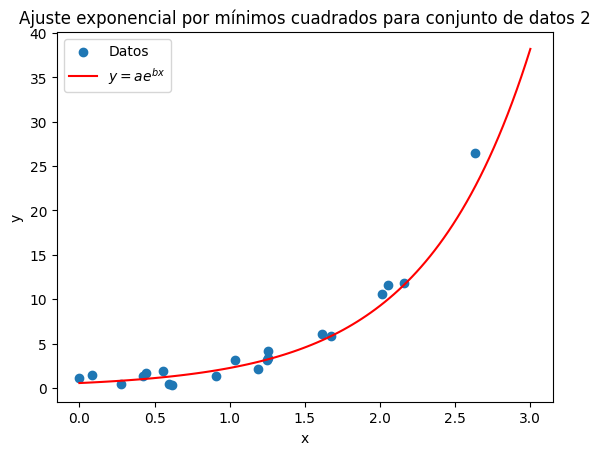

In [49]:
# graficar resultados del ajuste exponencial
m, b = ajustar_min_cuadrados(xs2, ys2, gradiente=[der_parcial_0, der_parcial_1])
x = np.linspace(0, 3, 100)
y = [a_real * np.exp(b * xi) for xi in x]
plt.scatter(xs2, ys2, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a e^{b x} $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste exponencial por mínimos cuadrados para conjunto de datos 2")
plt.legend()
plt.show()